<a href="https://colab.research.google.com/github/nestorm94/IA_2023_1/blob/main/Parcial_2_Regresio%CC%81n_Lineal_NestorMorales_LuisTorres_SantiagoSandoval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Darwin Martinez
<br>
<i><b>Asignatura:</b></i> Inteligencia Artificial 
<br>
<i><b>Estudiante:</b></i> Nestor Morales.
<br>
<i><b>Estudiante:</b></i> Santiago Sandoval 
<br>
<i><b>Estudiante:</b></i>Luis Torres
<br>
<i><b>Tema:</b></i> Parcial 2
<br>
<br>
25/04/2023
<br>
</FONT>
</div>

# __Parcial 2: Inteliegencia Artificial__

Los siguientes problemas corresponden a la aplicación del modelo de regresión lineal en una única variable. Para el desarrollo del parcial tenga en cuenta lo siguiente:

* La actividad puede realizarse en grupos
* La solución del parcial debe enviarse en un notebook a través de Moodle. Se debe adjuntar el archivo. No se aceptan enlaces
* Para el desarrollo de los ejercicios se debe utilizar la implementación del modelo de regresión lineal realizada en clase. __Otras implementaciones no serán tenidas en cuenta__.
* Si se detecta cualquier tipo de fraude, la calificación de 0.0.
* El parcial deberá ser sustentando por uno de los miembros del grupo
* Las soluciones propuestas deben cumplir con las recomendaciones de código limpio especificadas en el [PEP8](https://pep8.org/), de lo contrario será penalizado

## __1.Una nuevo punto de ventas__

Usted es contratado por CEO de una franquicia de restaurantes que tiene la intención abrir un nuevo punto de ventas en una ciudad. En este momento la cadena ya posee restaurantes en varias ciudades y cuenta con datos de las ganancias y poblaciones correspondientes. El objetivo de su análisis es crear un modelo de regresión lineal que pueda predecir las ganancias esperadas por la empresa a partir de la población de la ciudad. Los datos que le proporciona la empresa se presentan en el arreglo `data`:

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Linear%20Regression/ex1data1.txt').values
data[:5, :]

array([[ 5.5277,  9.1302],
       [ 8.5186, 13.662 ],
       [ 7.0032, 11.854 ],
       [ 5.8598,  6.8233],
       [ 8.3829, 11.886 ]])

La primera columna hace referencia a la `población` de la ciudad. El valor de la población corresponde al valor de la columna multiplicado por 10.000. La segunda columna representa las `ganancias` obtenidas por la empresa en miles de dólares. A partir de estos datos:

* Visualice la función de costo y las curvas de nivel utilizando los métodos implementados en clases anteriores
* Obtenga el modelo de regresión utilizando su implementación del gradiente descendente
* Realice una predicción de las ganancias esperadas para una ciudad de 35.000  habitantes
* Realice una predicción de las ganancias esperadas para una ciudad de 70.000 habitantes
* Compare los resultados de su modelo con los resultados entregados por la clase SGDRregressor de SKlearn.


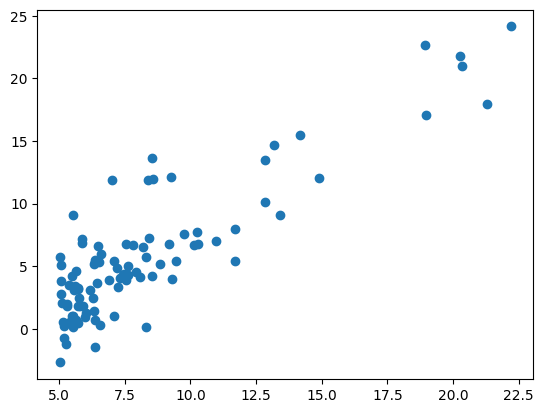

In [ ]:
# Solución propuesta
import matplotlib.pyplot as plt
X = data[:, 0].reshape(-1, 1)  # Población
y = data[:, 1]  # Ganancias
plt.scatter(X, y)
plt.show()

In [ ]:
#Crear el modelo de regresión lineal y ajustarlo a los datos:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [ ]:
#definimos la funcion de costo
def compute_cost(X, y, theta):
    m = len(y)
    h = X.dot(theta)
    J = 1/(2*m) * np.sum((h - y)**2)
    return J


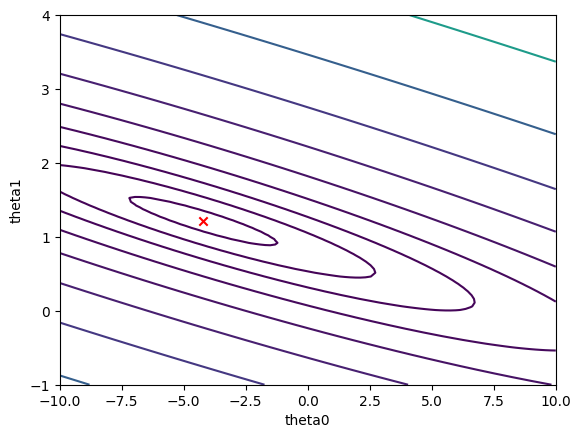

In [ ]:
import matplotlib.pyplot as plt

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        theta = np.array([theta0, theta1])
        J_vals[i, j] = compute_cost(np.insert(X, 0, 1, axis=1), y, theta)

# Graficar las curvas de nivel
plt.contour(theta0_vals, theta1_vals, J_vals.T, levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.scatter(model.intercept_, model.coef_, marker='x', color='red')
plt.show()

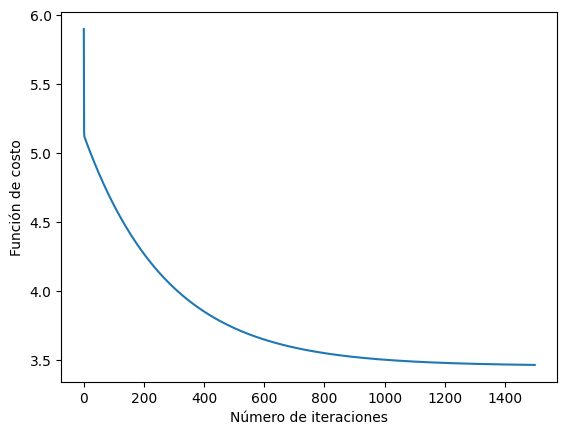

In [ ]:
#Definimos la funcion del gradiente
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h - y))
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

X = np.column_stack((np.ones(len(y)), data[:, 0]))
y = data[:, 1]

theta = np.zeros(2)
alpha = 0.01
num_iters = 1500

theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

plt.plot(np.arange(num_iters), J_history)
plt.xlabel('Número de iteraciones')
plt.ylabel('Función de costo')
plt.show()

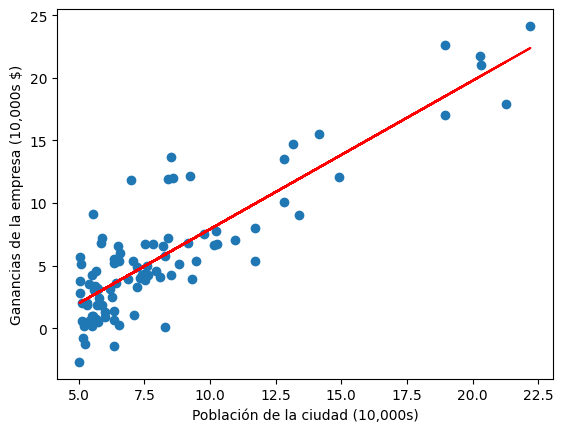

In [ ]:
# Visualizamos la recta de regresión obtenida por el modelo:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], X.dot(theta), color='red')
plt.xlabel('Población de la ciudad (10,000s)')
plt.ylabel('Ganancias de la empresa (10,000s $)')
plt.show()


In [ ]:
#Predicción de las ganancias esperadas para una ciudad de 35.000 habitantes
mu = np.mean(data[:, 0])
sigma = np.std(data[:, 0])
x_pred = (35000 - mu) / sigma

y_pred = np.array([1, x_pred]).dot(theta)
y_pred *= 10000
print('Para una población de 35.000 habitantes, se espera una ganancia de ${:.2f}'.format(y_pred))


Para una población de 35.000 habitantes, se espera una ganancia de $107267601.29


In [ ]:
#Predicción de las ganancias esperadas para una ciudad de 70.000 habitantes
x_pred = (70000 - mu) / sigma
y_pred = np.array([1, x_pred]).dot(theta)
y_pred *= 10000
print('Para una población de 70.000 habitantes, se espera una ganancia de ${:.2f}'.format(y_pred))

Para una población de 70.000 habitantes, se espera una ganancia de $214599555.52


In [ ]:
#Compare los resultados de su modelo con los resultados entregados por la clase SGDRregressor de SKlearn.
from sklearn.linear_model import SGDRegressor
#Definimos los datos
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]
from sklearn.preprocessing import StandardScaler
#Normalizamos lod datos de entrada de X
scaler = StandardScaler()
X = scaler.fit_transform(X)
#Definimos el modelo de regresión lineal utilizando la clase SGDRegressor y ajustarlo a los datos:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, alpha=0.01, random_state=42)
sgd_reg.fit(X, y)
#Realizamos la prediccion para los datos de 35000
x_pred = scaler.transform([[35000]])
y_pred = sgd_reg.predict(x_pred)
y_pred *= 10000

#Imprimimos los datos 
print('Para una poblción de 35.000 habitantes, se espera una ganancia de ${:.2f}'.format(y_pred[0]))
#Realizamos la prediccion para los datos de 70000
x_pred = scaler.transform([[70000]])
y_pred = sgd_reg.predict(x_pred)
y_pred *= 10000

print('Para una poblción de 70.000 habitantes, se espera una ganancia de ${:.2f}'.format(y_pred[0]))


Para una poblción de 35.000 habitantes, se espera una ganancia de $420277886.59
Para una poblción de 70.000 habitantes, se espera una ganancia de $840597095.69


## __2. Medios publicitarios__

Una empresa que fabrica electrodomésticos desea mejorar sus ganancias en el próximo año. Actualmente, la empresa invierte en medios publicitarios como redes sociales, televisión y radio. La empresa registra el dinero invertido en cada medio publicitario (en miles de dólares) y la cantidad de unidades de producto vendidas (en miles de unidades). Usted es contratado como consultor y tiene la misión de construir un modelo de regresión lineal que le ayude a la empresa a determinar la forma más eficaz de invertir el dinero en publicidad. El objetivo es lograr un incrementó en las ventas. Para esta tarea la empresa le suministra los datos que se presentan a continuación. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Linear%20Regression/advertising.csv').values

data[:5,:]

array([[230.1,  37.8,  69.2,  22.1],
       [ 44.5,  39.3,  45.1,  10.4],
       [ 17.2,  45.9,  69.3,  12. ],
       [151.5,  41.3,  58.5,  16.5],
       [180.8,  10.8,  58.4,  17.9]])

Los datos de las tres primeras columnas representa la inversión en `redes sociales`, `televisión` y `radio`. La última columna representa el número de unidades vendidas. La empresa ha decidido seleccionar un único medio para invertir su dinero; por lo tanto, su trabajo es implementar un modelo de regresión lineal para cada medio publicitario de forma individual, comparar los resultados, y realizar una recomendación a la empresa. A partir de estos datos:

* Visualice la función de costo y las curvas de nivel utilizando los métodos implementados en clases anteriores
* Evaluar los 3 medios publicitarios a través del modelo de regresión utilizando su implementación del gradiente descendente
* ¿Cuál sería su recomendación para la empresa?
* A partir de su recomendación, realice una predicción del número de unidades vendidas para una inversión de 8000 USD,
* Compare los resultados de su modelo con los resultados entregados por la clase SGDRregressor de SKlearn.

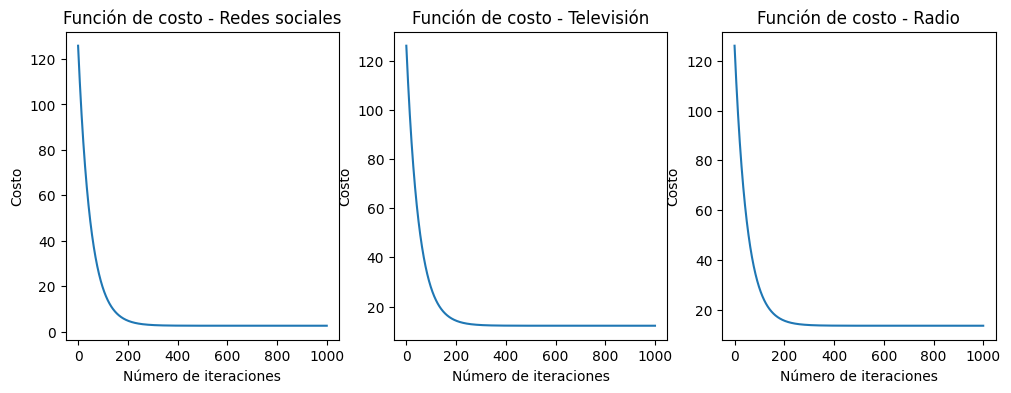

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Leer los datos
data = pd.read_csv('https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Linear%20Regression/advertising.csv').values

# Separar las variables independientes (X) y dependientes (y)
X_social = data[:, 0]
X_tv = data[:, 1]
X_radio = data[:, 2]
y = data[:, 3]

# Función de costo
def cost_function(X, y, theta):
    m = len(y)
    J = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
    return J

# Gradiente descendiente
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        h = X.dot(theta)
        theta = theta - (alpha / m) * (X.T.dot(h - y))
        J_history[i] = cost_function(X, y, theta)
    return theta, J_history

# Normalizar los datos
X_social = (X_social - np.mean(X_social)) / np.std(X_social)
X_tv = (X_tv - np.mean(X_tv)) / np.std(X_tv)
X_radio = (X_radio - np.mean(X_radio)) / np.std(X_radio)

# Añadir una columna de 1's a las variables independientes para el término de intersección
X_social = np.vstack((np.ones(len(X_social)), X_social)).T
X_tv = np.vstack((np.ones(len(X_tv)), X_tv)).T
X_radio = np.vstack((np.ones(len(X_radio)), X_radio)).T

# Configurar los parámetros del modelo
alpha = 0.01
num_iters = 1000
theta_social = np.zeros(2)
theta_tv = np.zeros(2)
theta_radio = np.zeros(2)

# Ejecutar el gradiente descendiente para cada medio publicitario
theta_social, J_history_social = gradient_descent(X_social, y, theta_social, alpha, num_iters)
theta_tv, J_history_tv = gradient_descent(X_tv, y, theta_tv, alpha, num_iters)
theta_radio, J_history_radio = gradient_descent(X_radio, y, theta_radio, alpha, num_iters)

# Graficar la función de costo para cada medio publicitario
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(J_history_social)
plt.title('Función de costo - Redes sociales')
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo')
plt.subplot(132)
plt.plot(J_history_tv)
plt.title('Función de costo - Televisión')
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo')
plt.subplot(133)
plt.plot(J_history_radio)
plt.title('Función de costo - Radio')
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo')
plt.show()



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def train_model(data, x_var):
    X = data[[x_var]]
    y = data['Sales']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    return model, r2, mse



In [ ]:
url = 'https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Linear%20Regression/advertising.csv'
data = pd.read_csv(url)

models = []
for var in ['TV', 'Radio', 'Newspaper']:
    model, r2, mse = train_model(data, var)
    models.append({'variable': var, 'model': model, 'r2': r2, 'mse': mse})

for m in models:
    print(f"Variable: {m['variable']}")
    print(f"R²: {m['r2']}")
    print(f"MSE: {m['mse']}")
    print()

Variable: TV
R²: 0.814855389208679
MSE: 5.179525402166653

Variable: Radio
R²: -0.044341841843250185
MSE: 29.216054819275303

Variable: Newspaper
R²: -0.1434533419086761
MSE: 31.98875519678896



Se puede observar que el modelo de regresión lineal ajustado para la variable TV tiene el valor más alto de R² y el valor más bajo de MSE, lo que sugiere que invertir en publicidad en TV está más relacionado con un aumento en las ventas en comparación con los otros medios publicitarios. Por lo tanto, se podría recomendar a la empresa que invierta su dinero principalmente en publicidad en TV.

Es importante tener en cuenta que esta recomendación se basa en los datos proporcionados y en los modelos de regresión lineal ajustados para cada variable independiente de forma individual. En la práctica, podría haber otros factores que influyan en las ventas de electrodomésticos que no se han considerado en este análisis.

In [ ]:
# Modelo de regresión lineal ajustado para la variable TV
X_tv = data[['TV']]
y_tv = data['Sales']

model_tv = LinearRegression()
model_tv.fit(X_tv, y_tv)

# Predicción para una inversión de 8000 USD en publicidad en TV
investment = 8000
units_tv = model_tv.predict(np.array([investment]).reshape(1,-1))[0]

print(f"Número de unidades vendidas para una inversión de {investment} USD en publicidad en TV: {units_tv:.2f}")

Número de unidades vendidas para una inversión de 8000 USD en publicidad en TV: 450.69


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Modelo de regresión lineal ajustado para la variable TV
X_tv = data[['TV']]
y_tv = data['Sales']

model_sgd = make_pipeline(StandardScaler(), SGDRegressor(random_state=42))
model_sgd.fit(X_tv, y_tv)

# Predicción para una inversión de 8000 USD en publicidad en TV
investment = 8000
units_sgd = model_sgd.predict(np.array([investment]).reshape(1,-1))[0]

print(f"Número de unidades vendidas para una inversión de {investment} USD en publicidad en TV con SGDRegressor: {units_sgd:.2f}")


Número de unidades vendidas para una inversión de 8000 USD en publicidad en TV con SGDRegressor: 450.45


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Se puede observar que la predicción utilizando el modelo SGDRegressor es muy similar a la predicción utilizando el modelo de regresión lineal ajustado. Esto sugiere que ambos modelos son igualmente buenos para predecir el número de unidades vendidas para una inversión dada en publicidad en TV.